In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline

from model import Schelling

Now we instantiate a model instance: a 20x20 grid, with an 80% chance of an agent being placed in each cell, and approximately 30% of agents set as minorities.

In [2]:
model = Schelling(20, 20, 0.7, 0.3)

0


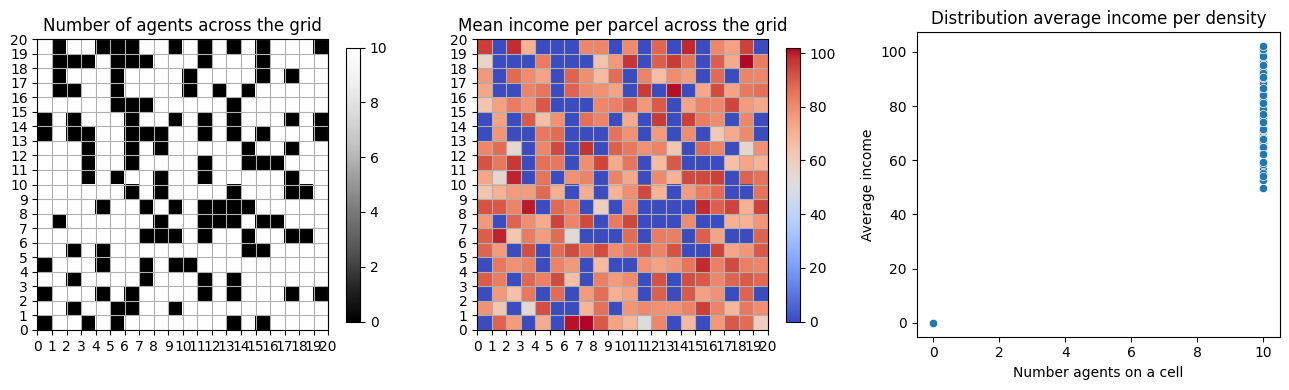

1


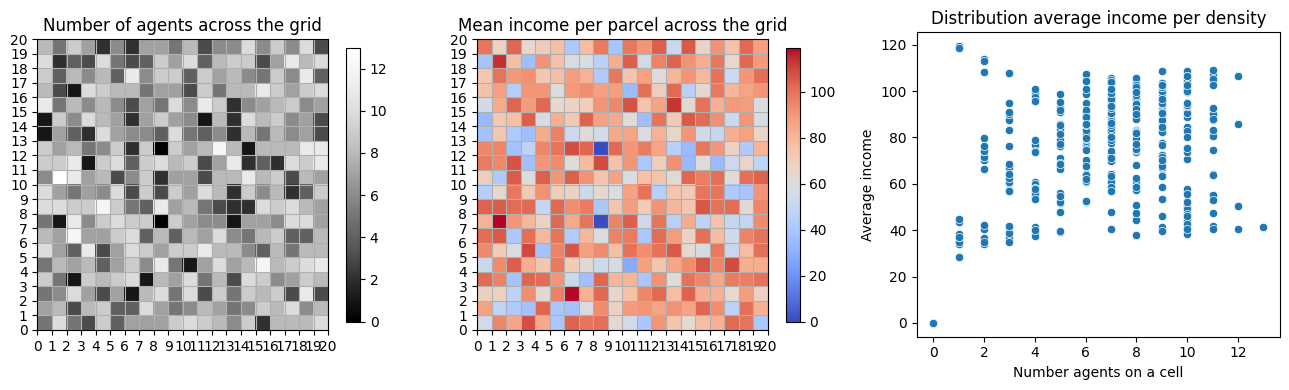

2


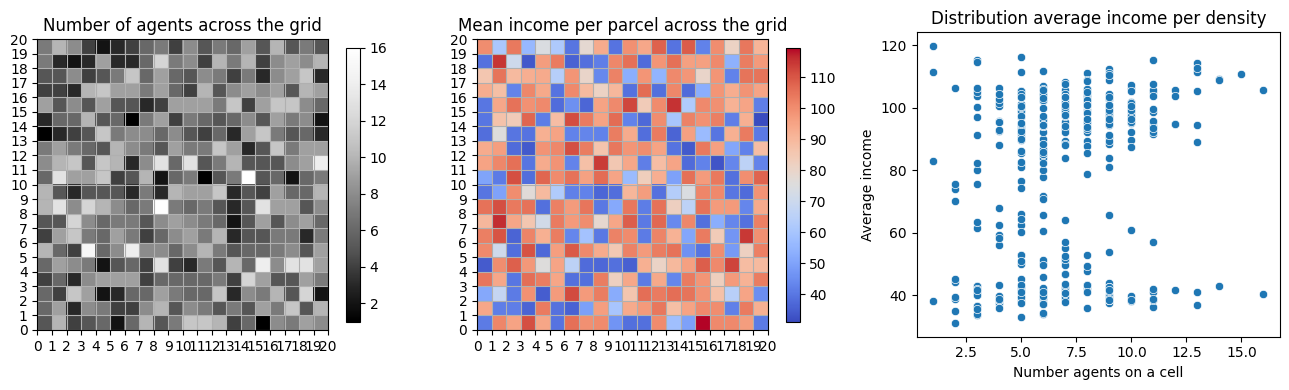

3


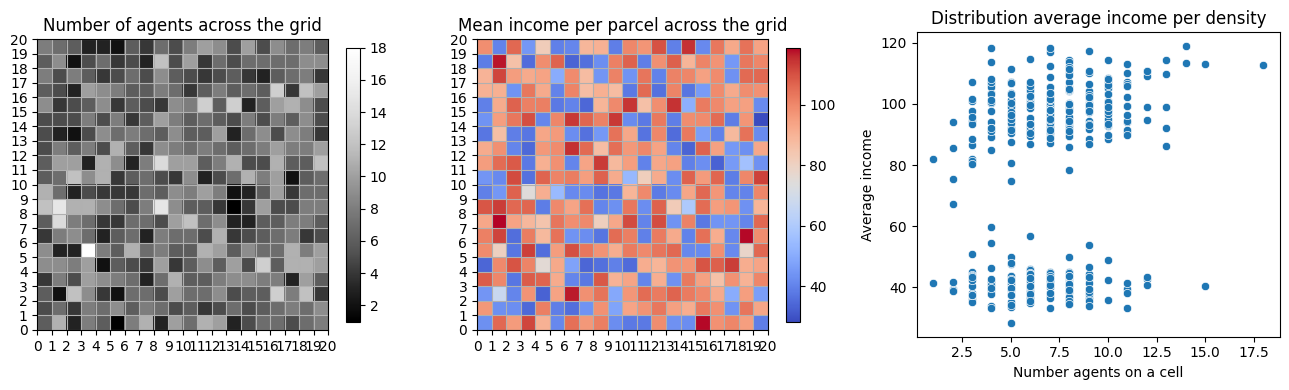

4


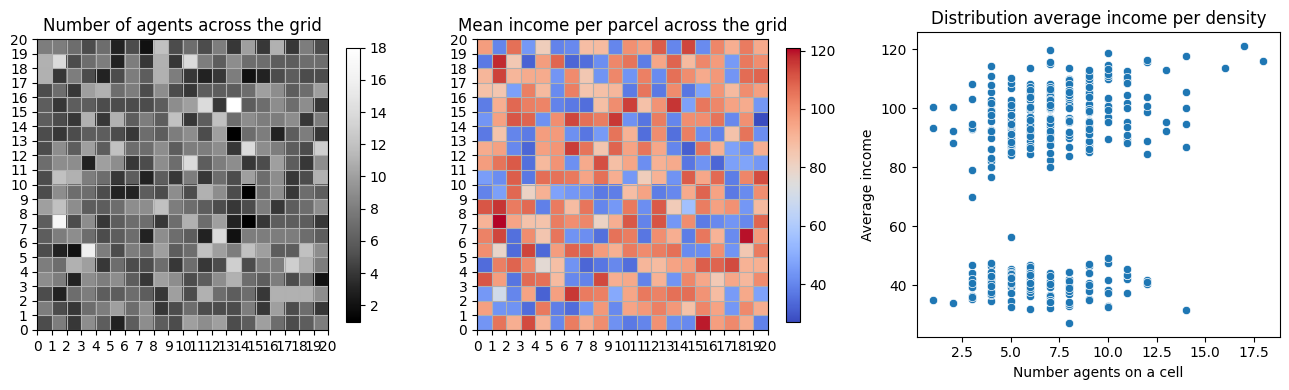

5


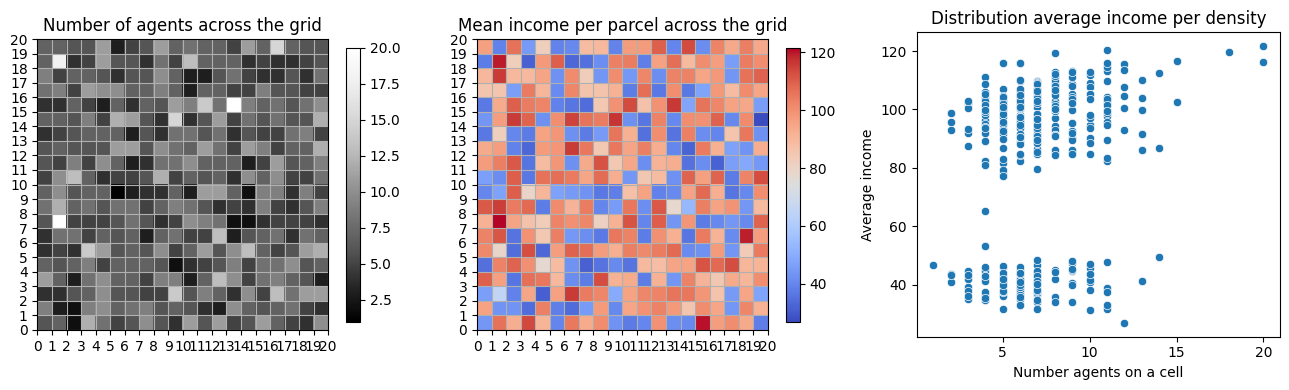

6


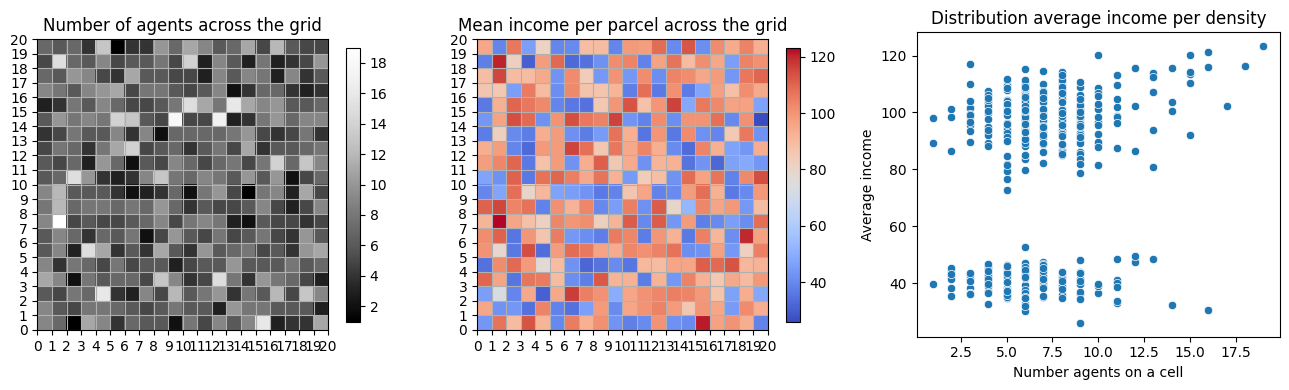

7


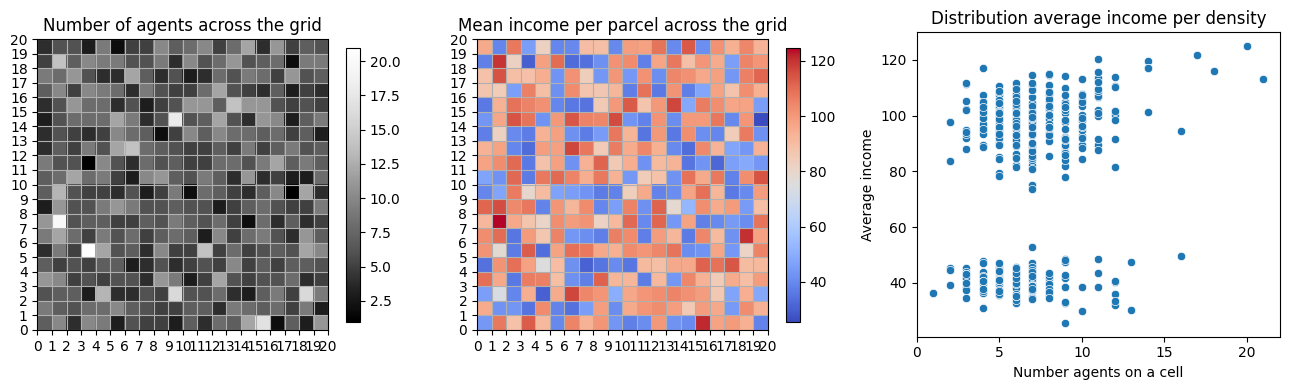

8


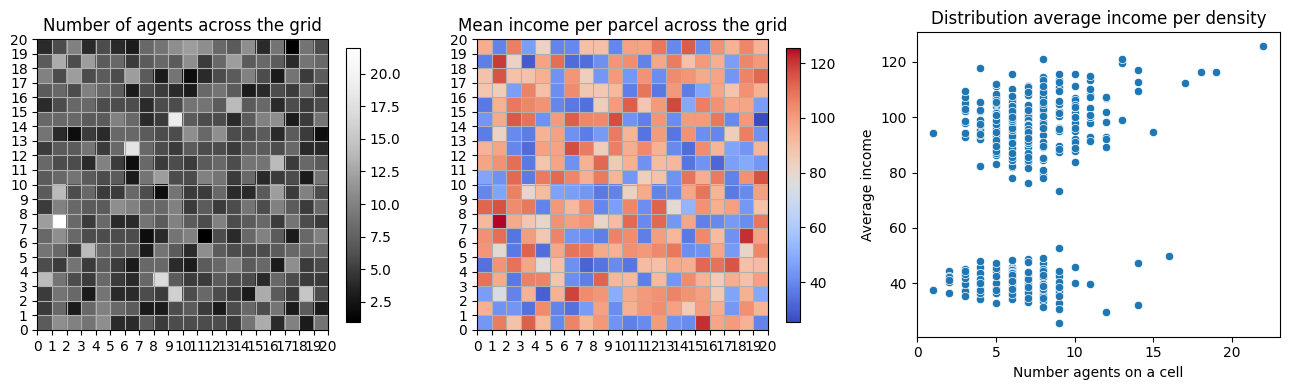

9


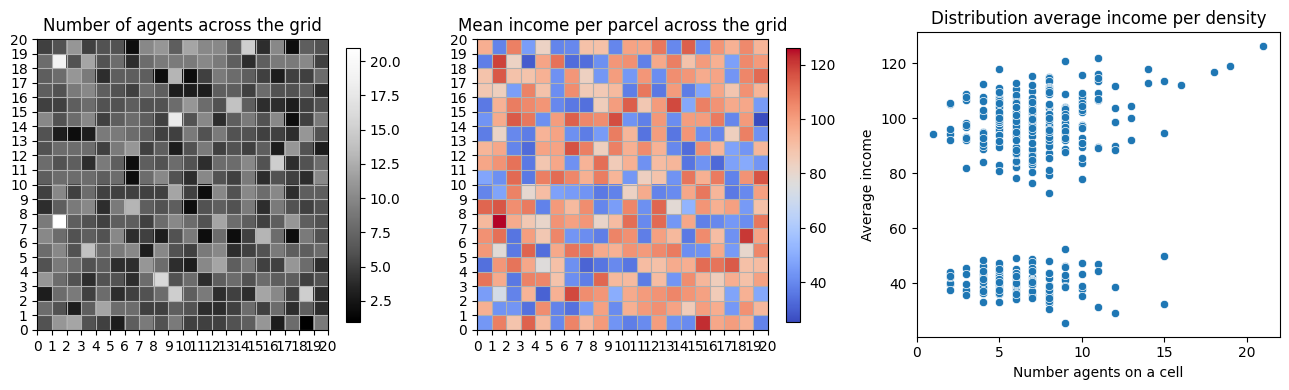

10


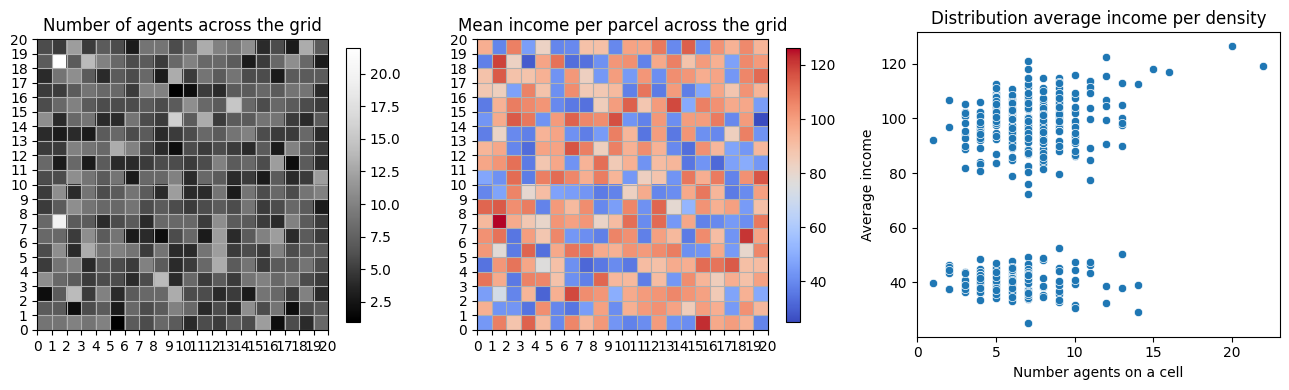

11


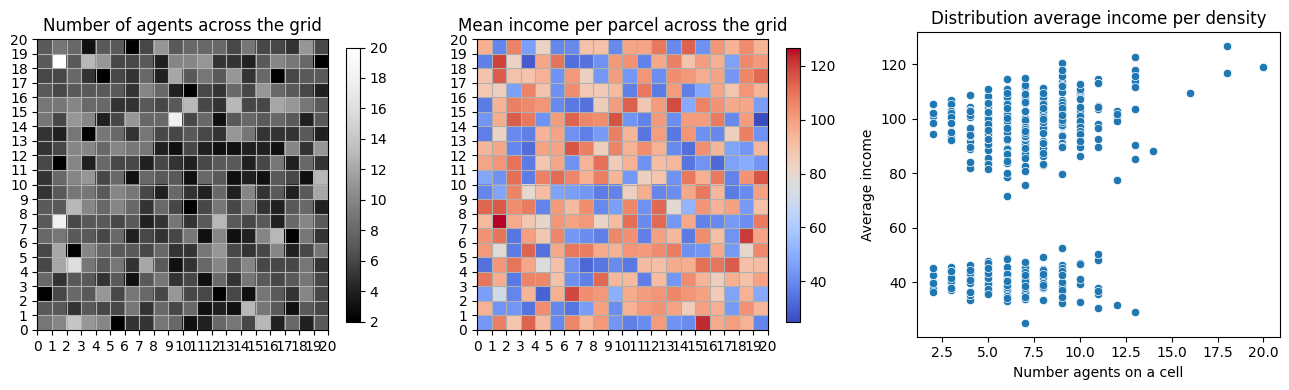

12


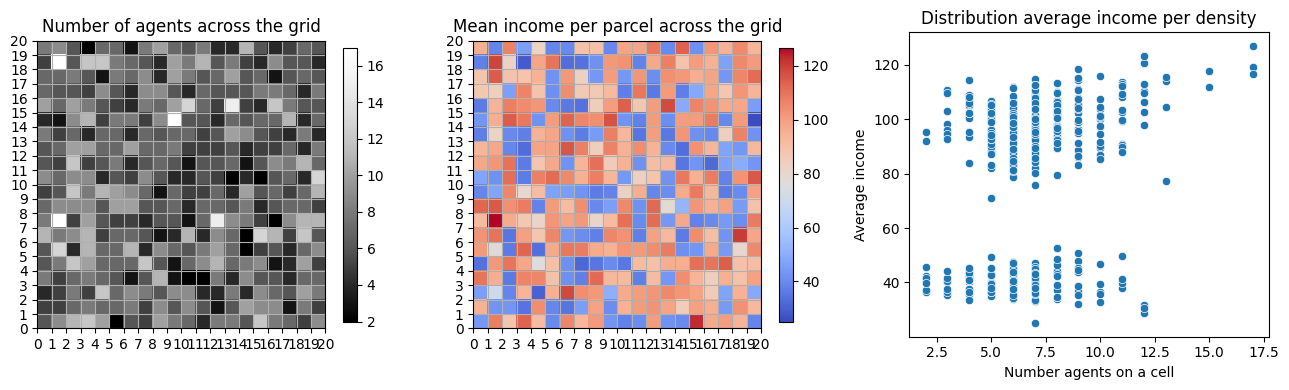

13


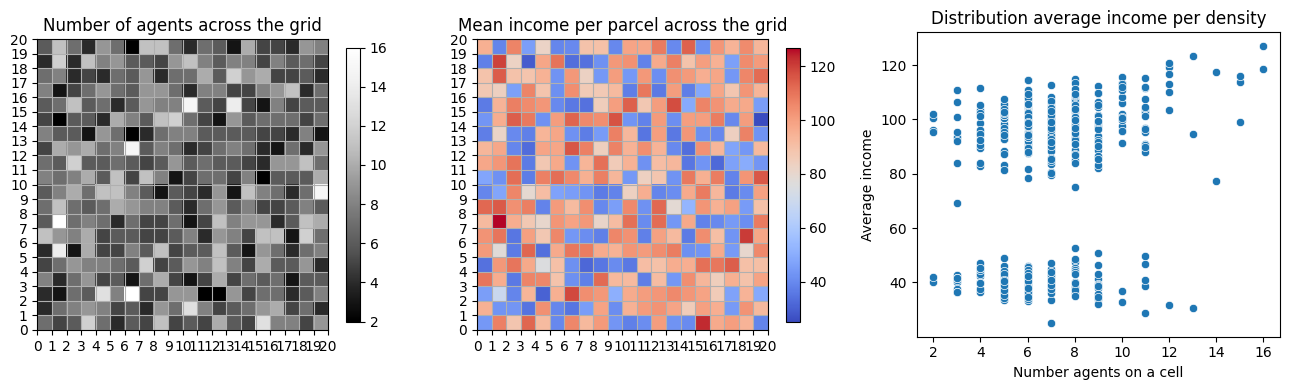

14


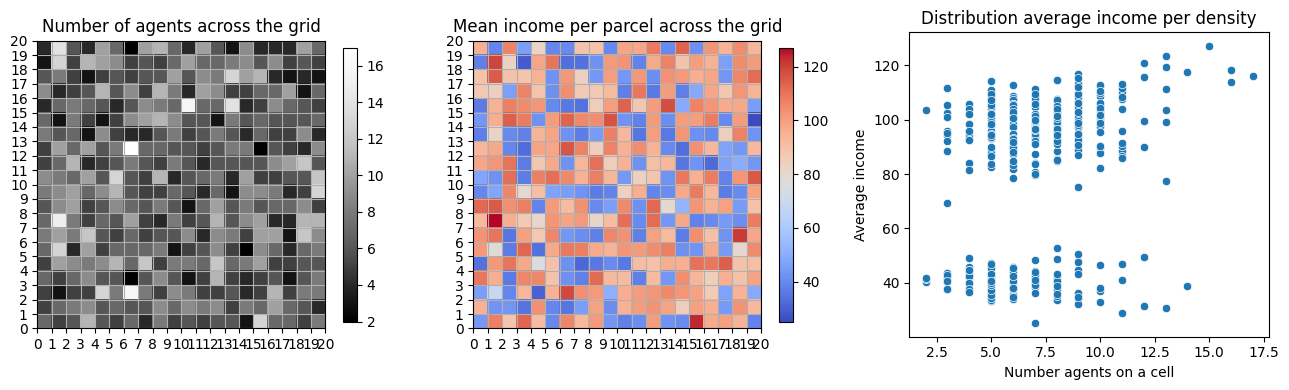

15


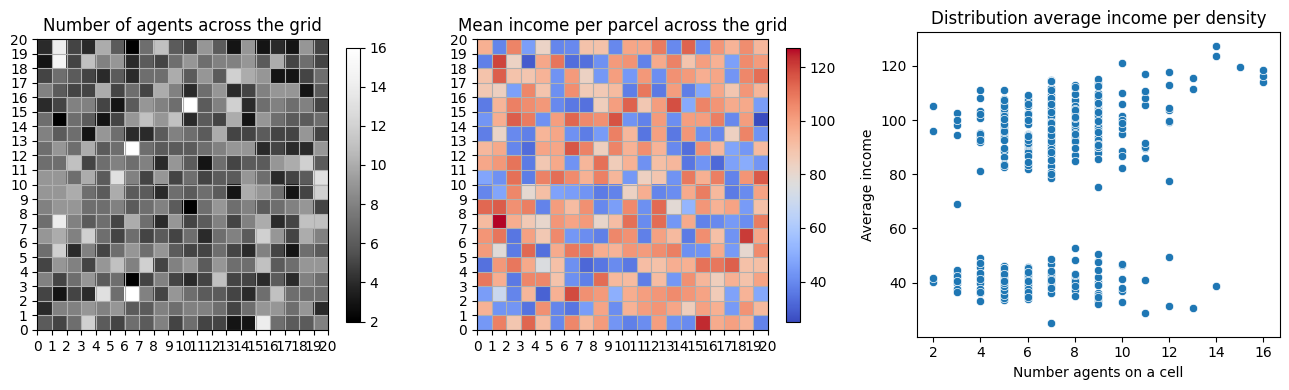

16


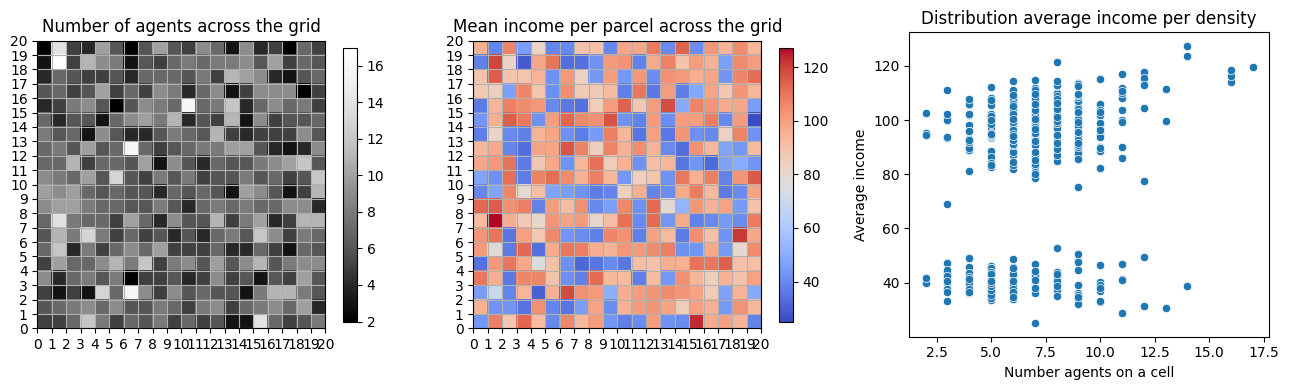

17


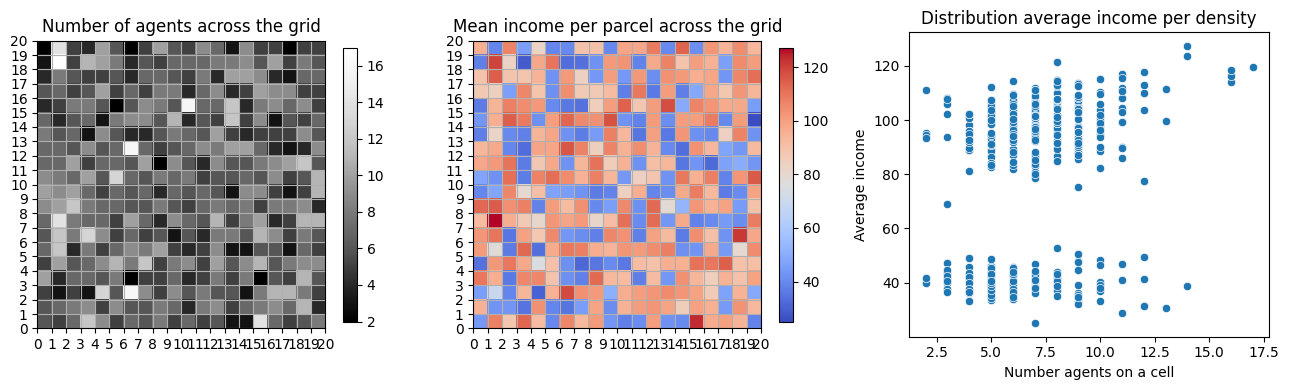

18


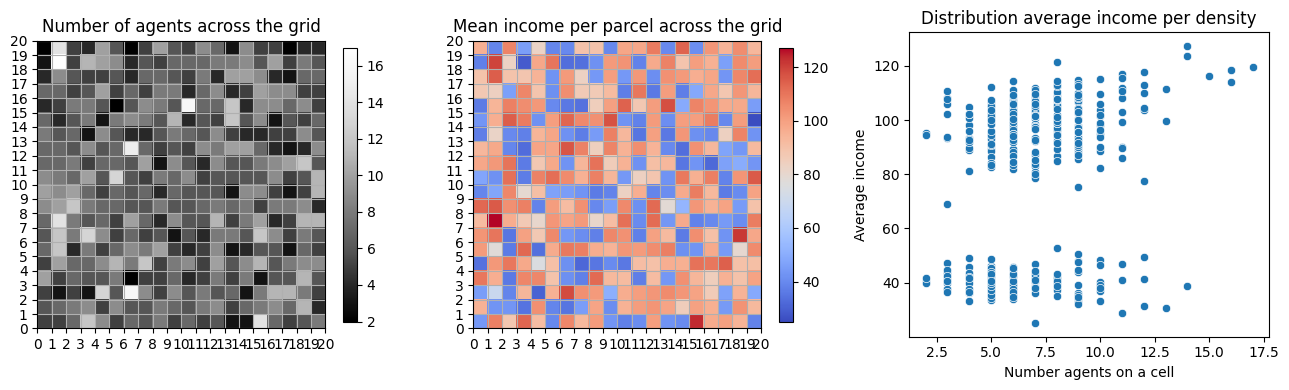

19


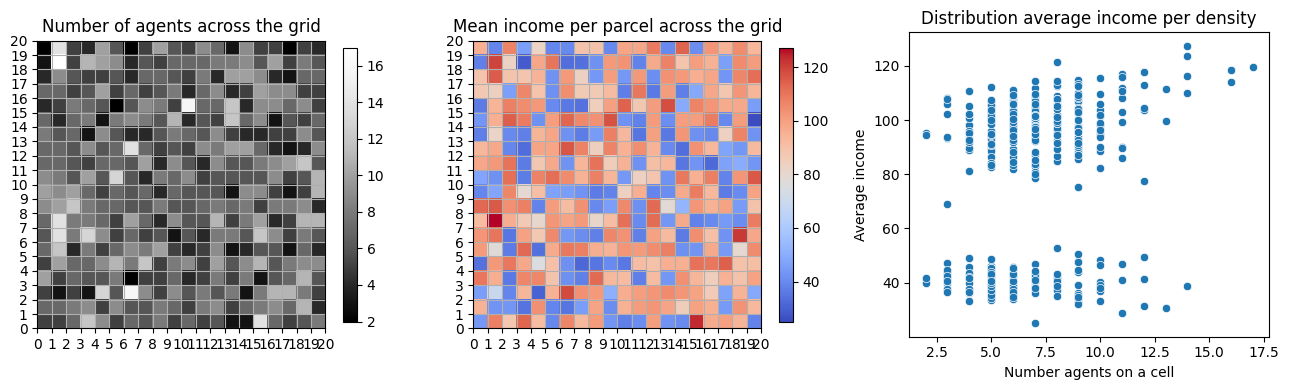

20


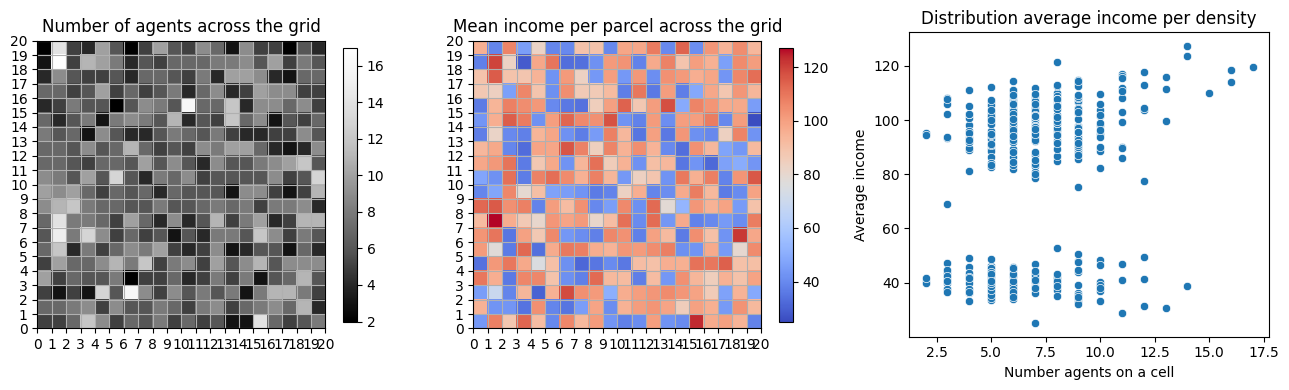

21


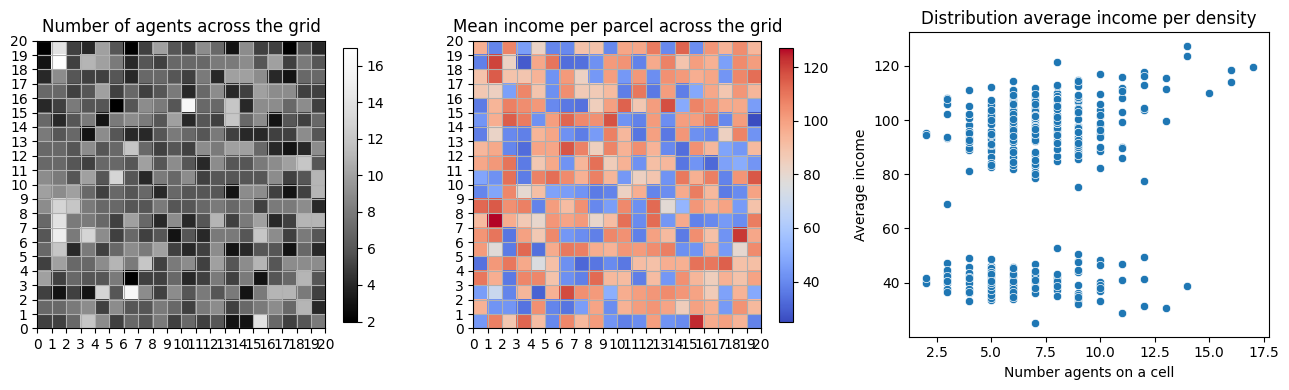

22


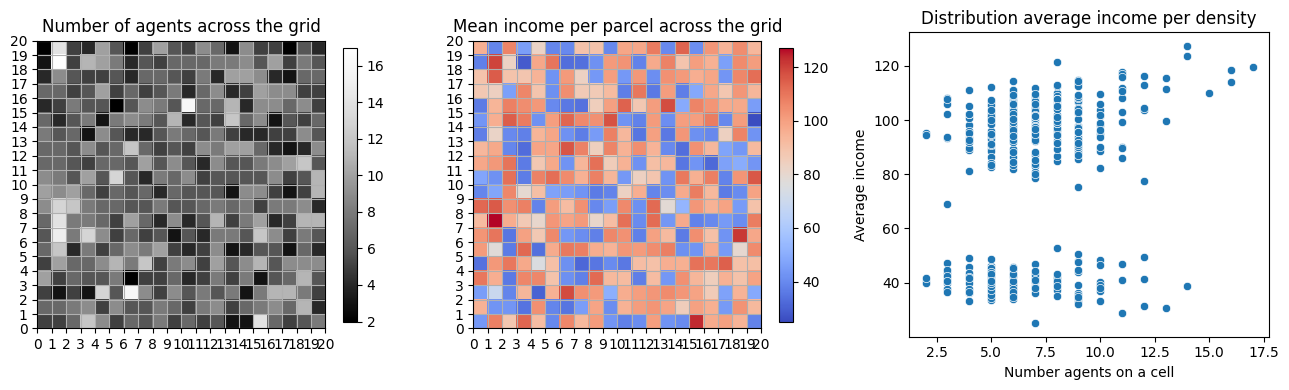

23


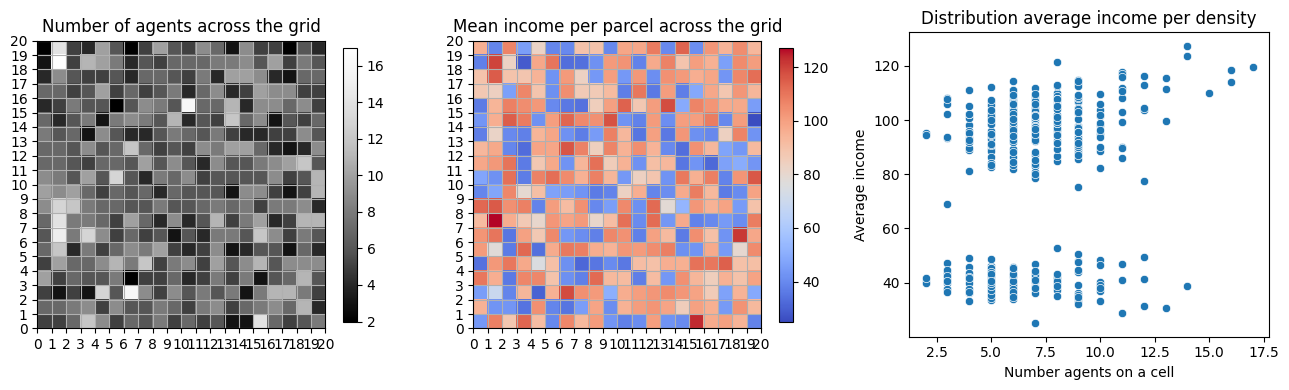

24


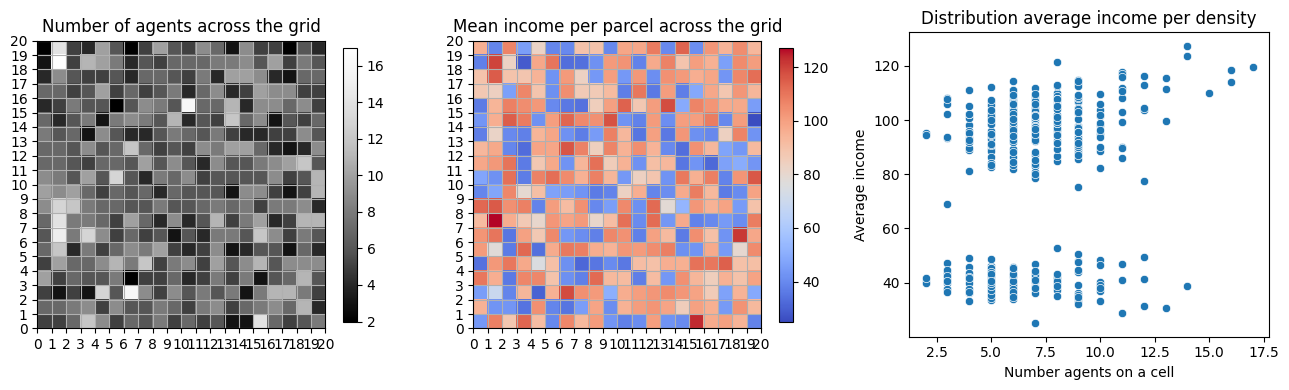

25


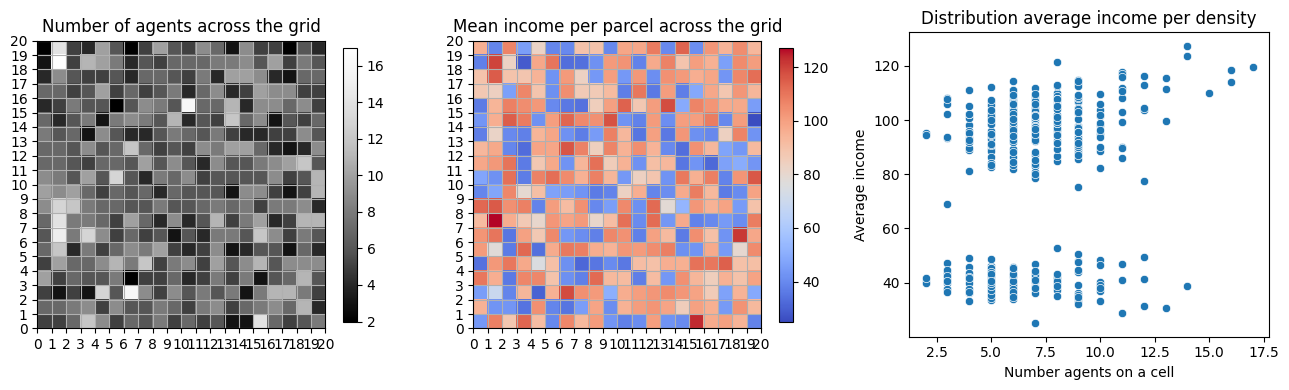

26


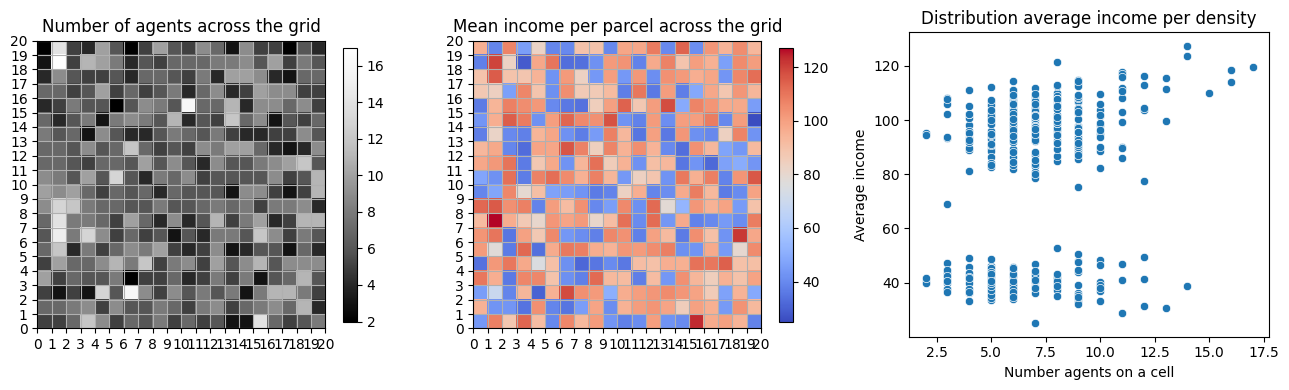

27


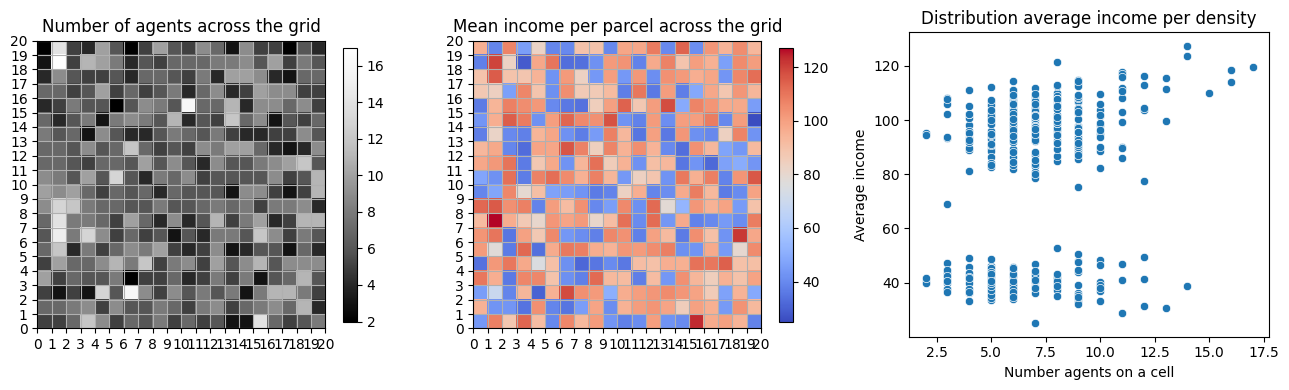

28


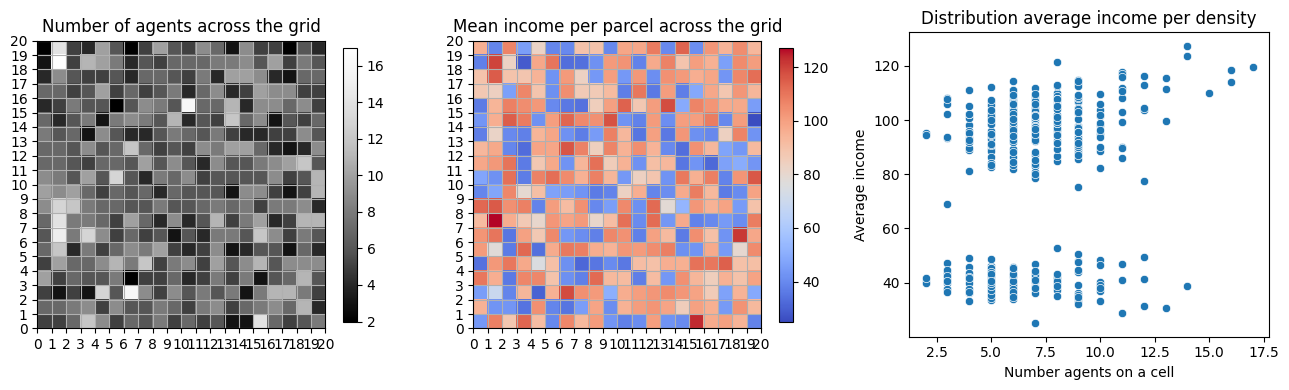

29


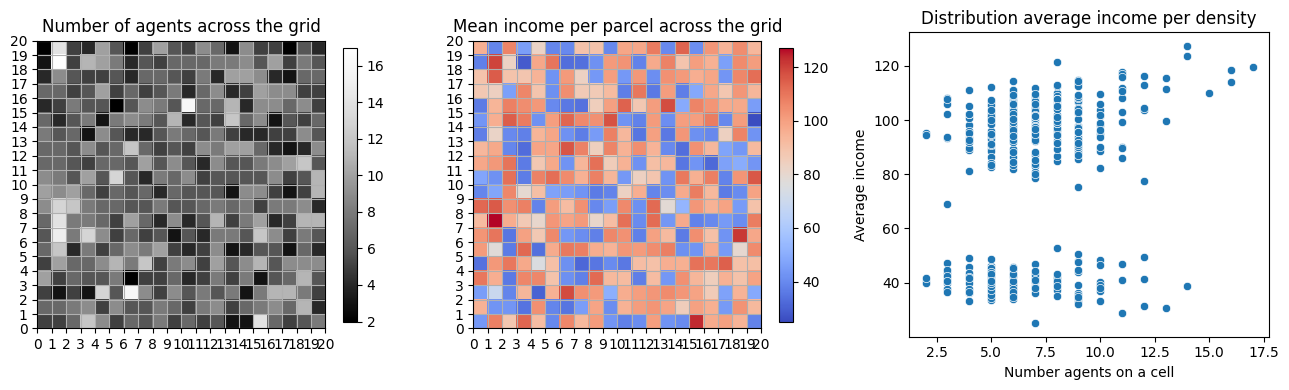

In [3]:
#Running the model for a certain amount of steps
while model.running and model.schedule.steps < 30:
    model.step()

## Analysing the results (Heatmaps) ##

The plots below are visualisation of the grid and how certain (properties of) agents are distributed throughout.

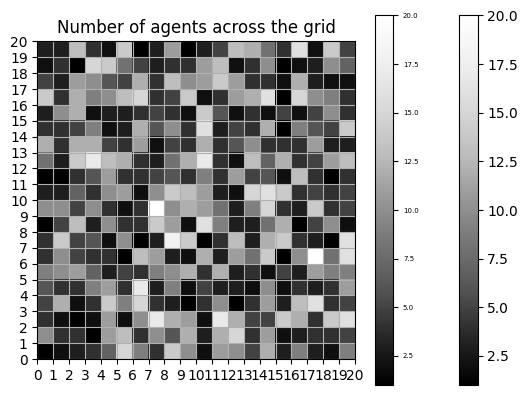

In [12]:
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, cmap="Greys_r", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of agents across the grid')
plt.colorbar()


# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()

As you can see from the above plot, after not many ticks, most agents are concentrated in a few cells. This is mainly due to the reds/majority moving to these 'wealthier' parcels (see third plot).

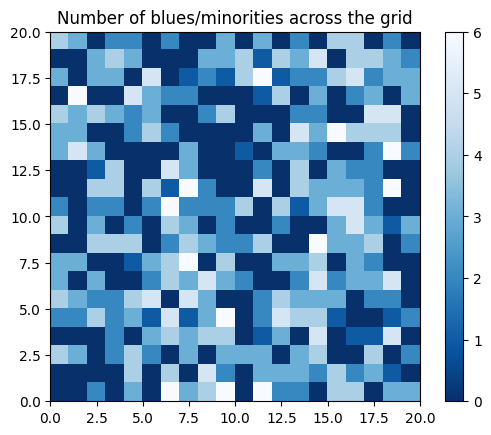

In [5]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    number_blues = 0
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        if agent.type == 1:
            number_blues += 1
    agent_counts[x][y] = number_blues
plt.imshow(agent_counts,  cmap="Blues_r",interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of blues/minorities across the grid')
plt.colorbar()

# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()

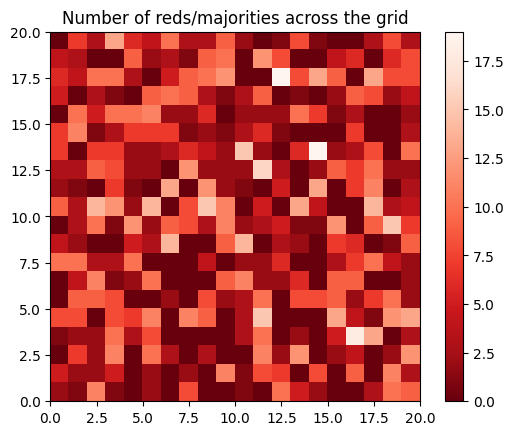

In [6]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    number_reds = 0
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        if agent.type == 0:
            number_reds += 1
    agent_counts[x][y] = number_reds
plt.imshow(agent_counts,cmap="Reds_r", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of reds/majorities across the grid')
plt.colorbar()

# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()

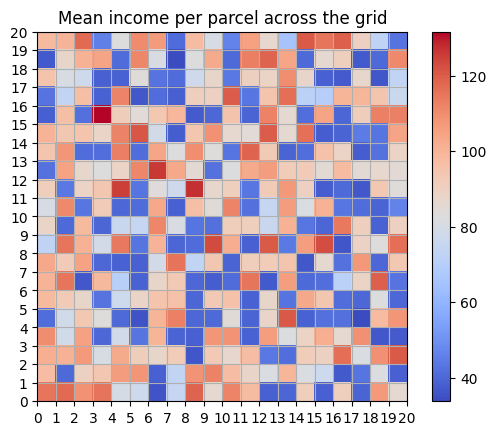

In [4]:
from statistics import mean

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    list_income = []
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        list_income.append(agent.income)
    mean_income = mean(list_income)
    agent_counts[x][y] = mean_income
plt.imshow(agent_counts, cmap="coolwarm", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Mean income per parcel across the grid')
plt.colorbar()

# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()